In [ ]:
!pip install nibabel
!pip install tensorflow
!pip install torch torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nibabel as nib
import os

# Path to the extracted data
data_path = './Task05_Prostate/'

# Function to recursively find .nii.gz files
def find_nii_files(directory):
    nii_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.nii.gz'):
                nii_files.append(os.path.join(root, file))
    return nii_files

# Find all .nii.gz files
nii_files = find_nii_files(data_path)

In [ ]:
import nibabel as nib
import os
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Load a random file
if nii_files:
    random_file = random.choice(nii_files)
    img = nib.load(random_file)
    img_data = img.get_fdata()

    # If the data has more than 3 dimensions, we select the first volume
    if img_data.ndim > 3:
        img_data = img_data[..., 0]

    # Function to plot 3D volume
    def plot_3d_volume(threshold, figsize_x, figsize_y):
        vol = img_data
        fig = plt.figure(figsize=(figsize_x, figsize_y))
        ax = fig.add_subplot(111, projection='3d')

        if threshold is not None:
            vol = np.where(vol > threshold, vol, 0)

        # Extract the non-zero voxel coordinates
        coords = np.nonzero(vol)

        # Plot the 3D scatter plot
        ax.scatter(coords[0], coords[1], coords[2], zdir='z', c=vol[coords], cmap='gray')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

        plt.show()

    # Interactive plot
    interact(plot_3d_volume,
             threshold=widgets.FloatSlider(min=0, max=np.max(img_data), step=0.1, value=0),
             figsize_x=widgets.FloatSlider(min=5, max=20, step=1, value=10),
             figsize_y=widgets.FloatSlider(min=5, max=20, step=1, value=10))

    # Print header information
    print(img.header)
else:
    print("No .nii.gz files found in the directory.")


interactive(children=(FloatSlider(value=0.0, description='threshold', max=1479.0), FloatSlider(value=10.0, des…

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 320 320  20   2   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.    0.625 0.625 3.6   1.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -81.725
qoffset_y       : -95.168
qoffset_z       : -74.1861
srow_x    

In [ ]:
import nibabel as nib
import os
import numpy as np

# Function to summarize header information
def summarize_headers(nii_files):
    header_summary = []
    for file in nii_files:
        try:
            img = nib.load(file)
            header_info = {
                'File': file,
                'Dimensions': img.header.get_data_shape(),
                'Voxel Sizes': img.header.get_zooms(),
                'Data Type': img.header.get_data_dtype(),
                'Intent': img.header.get_intent(),
                'Q Form Code': img.header['qform_code'],
                'S Form Code': img.header['sform_code']
                # Add more fields as needed
            }
            header_summary.append(header_info)
        except nib.filebasedimages.ImageFileError:
            print(f"Skipping invalid file: {file}")
    return header_summary

# Path to the extracted data
data_path = './Task05_Prostate/'

# Find all .nii.gz files
nii_files = [os.path.join(root, file)
             for root, _, files in os.walk(data_path)
             for file in files if file.endswith('.nii.gz') and not file.startswith('._')]

# Summarize headers
header_summary = summarize_headers(nii_files)

# Example analysis: Count unique dimensions
unique_dimensions = set(info['Dimensions'] for info in header_summary)
print(f"Unique Dimensions: {unique_dimensions}")

# Filter voxel sizes to only include those with length 3 (for 3D images)
voxel_sizes_3d = [info['Voxel Sizes'] for info in header_summary if len(info['Voxel Sizes']) == 3]

if voxel_sizes_3d:
    # Example analysis: Average voxel sizes for 3D images
    average_voxel_sizes = np.mean(voxel_sizes_3d, axis=0)
    print(f"Average Voxel Sizes: {average_voxel_sizes}")
else:
    print("No 3D images found with consistent voxel sizes.")

# Further statistical analysis and chart display can be done using the header_summary list


Unique Dimensions: {(320, 320, 20), (320, 320, 19), (256, 256, 15), (320, 320, 24, 2), (256, 256, 18), (320, 320, 22), (320, 320, 22, 2), (320, 320, 20, 2), (320, 320, 15, 2), (320, 320, 19, 2), (320, 320, 15), (320, 320, 17, 2), (256, 256, 15, 2), (320, 320, 24), (384, 384, 11, 2), (256, 256, 18, 2), (384, 384, 11)}
Average Voxel Sizes: [0.6321615 0.6321615 3.6812499]


In [ ]:
import nibabel as nib
import os
import numpy as np
from collections import defaultdict

# Function to summarize header information
def summarize_headers(nii_files):
    header_summary = []
    for file in nii_files:
        try:
            img = nib.load(file)
            header_info = {
                'File': file,
                'Dimensions': img.header.get_data_shape(),
                'Voxel Sizes': img.header.get_zooms(),
                'Data Type': img.header.get_data_dtype(),
                'Intent': img.header.get_intent(),
                'Q Form Code': img.header['qform_code'],
                'S Form Code': img.header['sform_code']
                # Add more fields as needed
            }
            header_summary.append(header_info)
        except nib.filebasedimages.ImageFileError:
            print(f"Skipping invalid file: {file}")
    return header_summary

# Path to the extracted data
data_path = './Task05_Prostate/'

# Find all .nii.gz files, ignoring macOS metadata files
nii_files = [os.path.join(root, file)
             for root, _, files in os.walk(data_path)
             for file in files if file.endswith('.nii.gz') and not file.startswith('._')]

# Summarize headers
header_summary = summarize_headers(nii_files)

# Group images by Dimensions and Voxel Sizes
groups = defaultdict(list)
for info in header_summary:
    key = (info['Dimensions'], info['Voxel Sizes'])
    groups[key].append(info['File'])

# Print grouped summaries
for key, files in groups.items():
    dimensions, voxel_sizes = key
    print(f"Group: Dimensions = {dimensions}, Voxel Sizes = {voxel_sizes}")
    print(f"Number of images: {len(files)}")
    print("Files:")
    for file in files:
        print(f"  - {file}")
    print("--------------------------------------")

# Example analysis: Count unique dimensions
unique_dimensions = set(info['Dimensions'] for info in header_summary)
print(f"Unique Dimensions: {unique_dimensions}")

# Filter voxel sizes to only include those with length 3 (for 3D images)
voxel_sizes_3d = [info['Voxel Sizes'] for info in header_summary if len(info['Voxel Sizes']) == 3]

if voxel_sizes_3d:
    # Example analysis: Average voxel sizes for 3D images
    average_voxel_sizes = np.mean(voxel_sizes_3d, axis=0)
    print(f"Average Voxel Sizes: {average_voxel_sizes}")
else:
    print("No 3D images found with consistent voxel sizes.")


Group: Dimensions = (320, 320, 20), Voxel Sizes = (0.625, 0.625, 3.6)
Number of images: 13
Files:
  - ./Task05_Prostate/labelsTr/prostate_16.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_32.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_43.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_06.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_14.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_38.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_17.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_21.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_40.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_07.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_35.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_01.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_13.nii.gz
--------------------------------------
Group: Dimensions = (320, 320, 15), Voxel Sizes = (0.6, 0.6000001, 4.000001)
Number of images: 2
Files:
  - ./Task05_Prostate/labelsTr/prostate_04.nii.gz
  - ./Task05_Prostate/labelsTr/prostate_34.nii.gz
---------

In [ ]:
import nibabel as nib
import os

# Group 2 image files
image_files = [
    './Task05_Prostate/imagesTr/prostate_43.nii.gz',
    './Task05_Prostate/imagesTr/prostate_32.nii.gz',
    './Task05_Prostate/imagesTr/prostate_16.nii.gz',
    './Task05_Prostate/imagesTr/prostate_06.nii.gz',
    './Task05_Prostate/imagesTr/prostate_14.nii.gz',
    './Task05_Prostate/imagesTr/prostate_38.nii.gz',
    './Task05_Prostate/imagesTr/prostate_21.nii.gz',
    './Task05_Prostate/imagesTr/prostate_40.nii.gz',
    './Task05_Prostate/imagesTr/prostate_07.nii.gz',
    './Task05_Prostate/imagesTr/prostate_35.nii.gz',
    './Task05_Prostate/imagesTr/prostate_17.nii.gz',
    './Task05_Prostate/imagesTr/prostate_01.nii.gz',
    './Task05_Prostate/imagesTr/prostate_13.nii.gz',
    './Task05_Prostate/imagesTs/prostate_30.nii.gz',
    './Task05_Prostate/imagesTs/prostate_36.nii.gz',
    './Task05_Prostate/imagesTs/prostate_12.nii.gz',
    './Task05_Prostate/imagesTs/prostate_23.nii.gz',
    './Task05_Prostate/imagesTs/prostate_19.nii.gz',
    './Task05_Prostate/imagesTs/prostate_11.nii.gz',
    './Task05_Prostate/imagesTs/prostate_27.nii.gz'
]

# Function to load NIfTI images
def load_images(image_files):
    images = []
    for file in image_files:
        img = nib.load(file)
        images.append(img)
    return images

# Load images
group2_images = load_images(image_files)

# Print number of images loaded
print(f"Number of images loaded: {len(group2_images)}")


Number of images loaded: 20


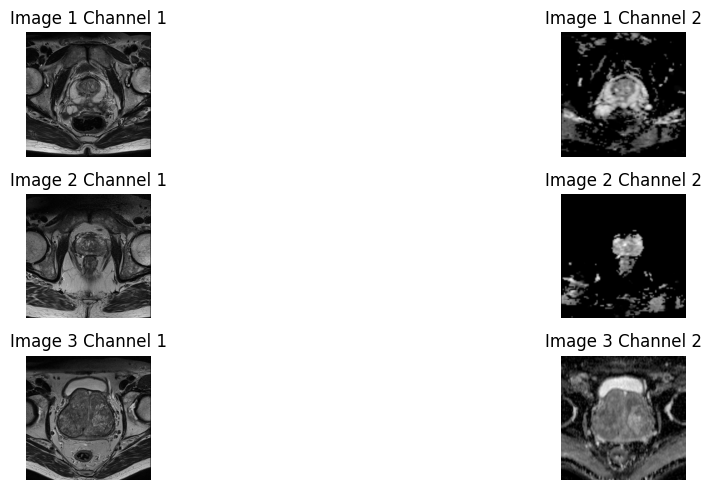

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to visualize sample images
def visualize_images(images, num_samples=3):
    fig, axes = plt.subplots(num_samples, images[0].shape[-1], figsize=(15, 5))
    for i in range(num_samples):
        img = images[i].get_fdata()
        # For 3D volumes, display middle slices along the third axis
        slice_index = img.shape[-2] // 2
        for j in range(img.shape[-1]):
            axes[i, j].imshow(np.rot90(img[..., slice_index, j]), cmap='gray')  # Assuming grayscale images
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Image {i+1} Channel {j+1}")
    plt.tight_layout()
    plt.show()

# Visualize first 3 images
visualize_images(group2_images, num_samples=3)


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import ipywidgets as widgets
from ipywidgets import interact, fixed

# Load one of the images from group2_images
file_path = './Task05_Prostate/imagesTr/prostate_43.nii.gz'
img = nib.load(file_path)
img_data = img.get_fdata()

# Function to plot 3D volume
def plot_3d_volume(threshold, figsize_x, figsize_y):
    vol = img_data

    fig = plt.figure(figsize=(figsize_x, figsize_y))
    ax = fig.add_subplot(111, projection='3d')

    if threshold is not None:
        vol = np.where(vol > threshold, vol, 0)

    # Extract the non-zero voxel coordinates
    coords = np.nonzero(vol)

    # Clear previous plot
    ax.clear()

    # Plot the 3D scatter plot
    ax.scatter(coords[0], coords[1], coords[2], zdir='z', c=vol[coords], cmap='gray')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Interactive plot
interact(plot_3d_volume,
         threshold=widgets.FloatSlider(min=0, max=np.max(img_data), step=0.1, value=0),
         figsize_x=widgets.FloatSlider(min=5, max=20, step=1, value=10),
         figsize_y=widgets.FloatSlider(min=5, max=20, step=1, value=10))


interactive(children=(FloatSlider(value=0.0, description='threshold', max=3492.0), FloatSlider(value=10.0, des…

<function __main__.plot_3d_volume(threshold, figsize_x, figsize_y)>